# SVD for SasView

### Import the Required libraries

In [24]:
from sasdata.dataloader.loader import Loader
from sas.sascalc.pr.invertor import Invertor
import matplotlib.pyplot as plt
import numpy as np

### Load the data and set the necessary variables

In [25]:
raw_data = Loader()
test_data = raw_data.load("1d_data/Anton-Paar.pdh")
x_data = test_data[0].x
y_data = test_data[0].y
data = test_data[0].dy

q = np.sqrt(x_data**2 + y_data**2)
Iq = data

Nq=len(q) # total number of combined q and theta values
qmax=round(max(q),2)


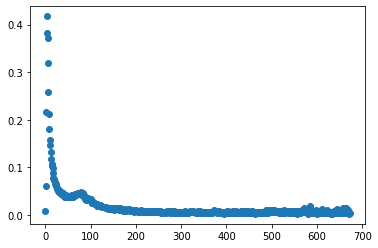

In [26]:
plt.plot(data, 'o')
plt.show()

In [27]:

#==============================================================================
# phi and r are the polar coordinates in real space

Nr=51 # number of r values in P(r) distributions
Nphi=72 # number of phi values for which P(r) is determined # number of slices
N=Nr*Nphi # total number of combined r and phi values 

In [28]:
Dmax=200 # maximal size of scatteres as usually defined for IFTs

r1=np.linspace(0,Dmax,Nr)
r1[0]=+1.e-3 # r can't start at 0

Deltaphi=360.0/float(Nphi)
phi11=np.linspace(0.,360.0-Deltaphi,Nphi)
phi1=phi11/180.0*np.pi
       
r=[]
phi=[]  
phiGrad=[]            
for i in range(Nphi):
    for j in range(Nr):
        r.append(r1[j])
        phi.append(phi1[i])

### Construction of matrix K for the the input for SVD

In [29]:
#==============================================================================
# Construction of system matrix K

def Aij(q,r,phi):
    return np.cos(q*r*np.cos(phi))

qmat=np.tile(q,(N,1)).T
rmat=np.tile(r,(Nq,1))
phimat=np.tile(phi,(Nq,1))
 
K=Aij(qmat,rmat,phimat)  

### Runing the SVD algorithm

In [30]:
U, s, V = np.linalg.svd( K, full_matrices=False)
rank=20 # number of singular values considered for reconstruction

In [31]:
# A.2) reconstruction of correlation function P(r)

b=(U.T).dot(Iq)
g=[]
for i in range(len(b)):
    if s[i]>rank:
        g.append(b[i]/s[i])
    else:
        g.append(0)

g=np.asarray(g)
Vm=(V.T).dot(g)
Pr=np.asarray(Vm)  
PrList=np.reshape(Pr,(Nphi,Nr))
Iqfit=K.dot(Pr)

PrList=np.reshape(Pr,(Nphi,Nr))

### Ploting

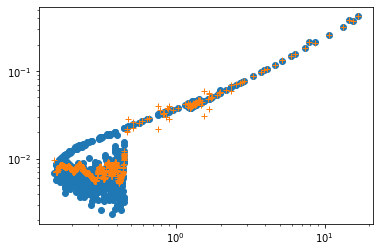

Figure A.1: 1D plot of data and fit (TSVD)


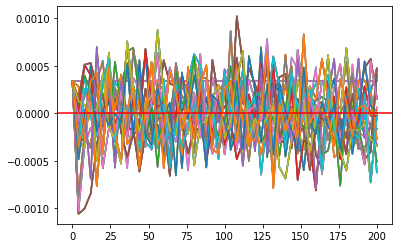

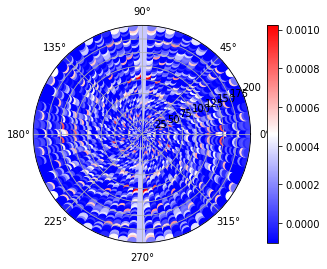

Figure A.3: 2D plot of P(r) (TSVD)


In [32]:
plt.loglog(q,Iq,'o')
plt.loglog(q,Iqfit,'+')
plt.show()
print('Figure A.1: 1D plot of data and fit (TSVD)')

for i in range(Nphi):    
    plt.plot(r1,PrList[i,:])
plt.axhline(y=0.0, color='r', linestyle='-')    
plt.show()  

PrMax=abs(np.max(Pr))
r=np.asarray(r)
sP=r*0.5

figC = plt.figure()
axC = figC.add_subplot(111, projection='polar')
cC = axC.scatter(phi, r, c=Pr, s=sP,  marker='o', vmin=-PrMax/10.0,vmax=PrMax, cmap='bwr')
axC.set_rmax(Dmax)
plt.colorbar(cC,orientation='vertical')
plt.show()
print('Figure A.3: 2D plot of P(r) (TSVD)') 